# Ch 04: Concept 01

## Linear regression for classification (just for demonstrative purposes)

import the usual librarise

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

우리가 어떤 데이터를 가지고 있고 이것을 분류해야 한다고 가정하자. 

우리에게는 1차원의 데이터가 있을 것이다. 

5에 가까운 수는 0으로 분류될 것이고 2에 가까운 수는 1로 분류될거라고 하자.

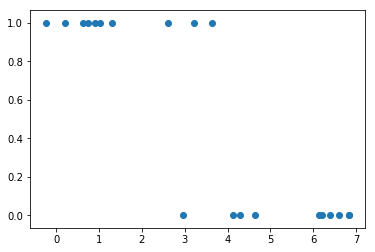

In [2]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

hyper parameter와 placeholders, variables를 설정하자.

In [3]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

w = tf.Variable([0., 0.], name="parameters")

모델을 설정하자. 어렵게 표현되어 있지만 결국 단순회귀식이다.

< Y = W * X + a > 이 식이다. 

In [4]:
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

모델을 설정한뒤 cost 를 설정한다.

In [5]:
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))

training op를 set up 한다. 또한 accurcy를 계산하기 위한 op 역시 set up 한다.

In [6]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

세션을 준비한다.

In [7]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

op를 통해 알고리즘을 학습시킨다.

In [8]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    if epoch % 100 == 0:
        print(epoch, current_cost)

0 9.17753
100 1.99798
200 1.43668
300 1.39251
400 1.38904
500 1.38876
600 1.38874
700 1.38874
800 1.38874
900 1.38874


최종 결과를 확인하자.

In [9]:
w_val = sess.run(w)
print('learned parameters', w_val)

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

sess.close()

learned parameters [ 1.10828495 -0.17617911]
accuracy 0.9


최종 결과를 시각화시킨다.

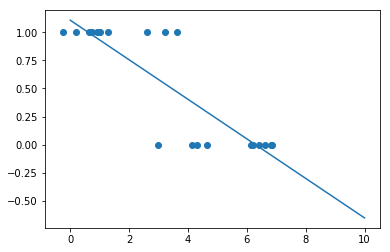

In [10]:
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.show()